Датасет "Предсказание стоимости автомобиля" Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

Шаг 1: Выбор входных и выходных переменных
Анализ датасета:

Датасет содержит следующие колонки: ID, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags.

Для простоты выберем числовые переменные, которые могут влиять на налог (Levy).

Выбор переменных:

Входные переменные:

Price (Цена автомобиля) — влияет на налог.

Mileage (Пробег автомобиля) — также может влиять на налог.

Выходная переменная:

Levy (Налог на автомобиль) — целевая переменная, которую будем прогнозировать.

Шаг 2: Настройка параметров лингвистических переменных
Определение диапазонов значений:

Для каждой переменной (Price, Mileage, Levy) зададим диапазон значений на основе данных из датасета.

Определение термов и функций принадлежности:

Для каждой переменной создадим несколько термов (например, "Низкий", "Средний", "Высокий").

Используем треугольные функции принадлежности (trimf) для простоты.

Пример для переменной Price:

Термы: "Низкая", "Средняя", "Высокая".

Параметры функций принадлежности:

Низкая: (0, 5000, 10000)

Средняя: (8000, 15000, 20000)

Высокая: (18000, 25000, 30000)

Пример для переменной Mileage:

Термы: "Низкий", "Средний", "Высокий".

Параметры функций принадлежности:

Низкий: (0, 50000, 100000)

Средний: (80000, 150000, 200000)

Высокий: (180000, 250000, 300000)

Пример для переменной Levy:

Термы: "Низкий", "Средний", "Высокий".

Параметры функций принадлежности:

Низкий: (0, 500, 1000)

Средний: (800, 1500, 2000)

Высокий: (1800, 2500, 3000)

Визуализация функций принадлежности:

Используем matplotlib для построения графиков функций принадлежности.

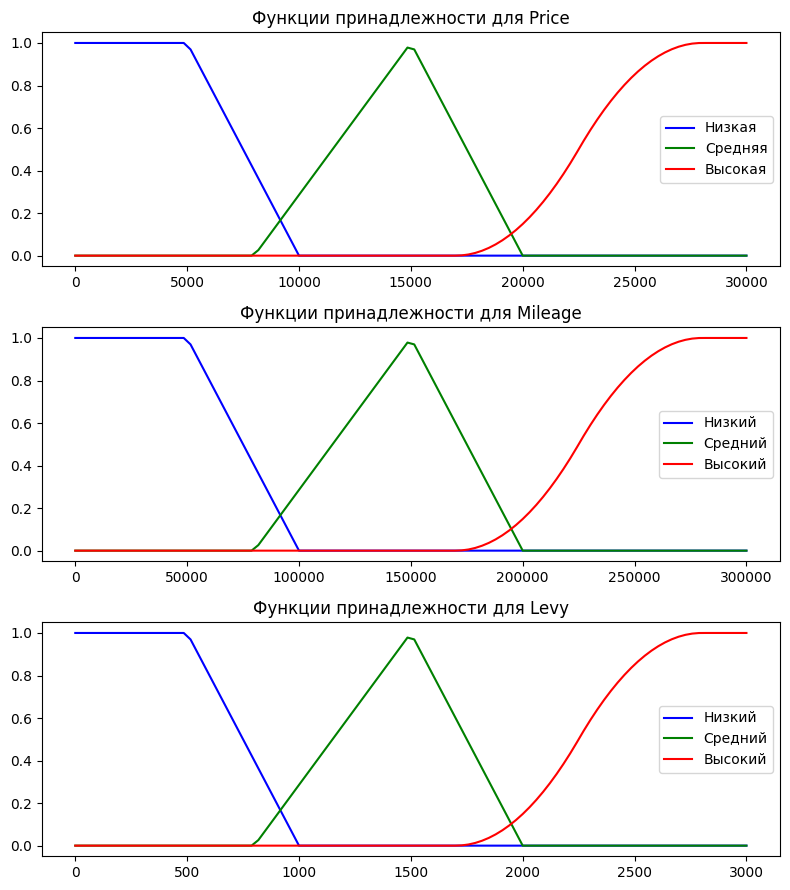

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Определение диапазонов значений
x_price = np.linspace(0, 30000, 100)
x_mileage = np.linspace(0, 300000, 100)
x_levy = np.linspace(0, 3000, 100)

# Функции принадлежности для Price
price_low = fuzz.trapmf(x_price, [0, 0, 5000, 10000])  # Трапециевидная слева
price_medium = fuzz.trimf(x_price, [8000, 15000, 20000])  # Треугольная
price_high = fuzz.smf(x_price, 17000, 28000)  # S-образная функция: 0 до 20000, затем рост

# Функции принадлежности для Mileage
mileage_low = fuzz.trapmf(x_mileage, [0, 0, 50000, 100000])  # Трапециевидная слева
mileage_medium = fuzz.trimf(x_mileage, [80000, 150000, 200000])  # Треугольная
mileage_high = fuzz.smf(x_mileage, 170000, 280000)  # S-образная функция: 0 до 200000, затем рост

# Функции принадлежности для Levy
levy_low = fuzz.trapmf(x_levy, [0, 0, 500, 1000])  # Трапециевидная слева
levy_medium = fuzz.trimf(x_levy, [800, 1500, 2000])  # Треугольная
levy_high = fuzz.smf(x_levy, 1700, 2800)  # S-образная функция: 0 до 2000, затем рост

# Визуализация функций принадлежности
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_price, price_low, 'b', linewidth=1.5, label='Низкая')
ax0.plot(x_price, price_medium, 'g', linewidth=1.5, label='Средняя')
ax0.plot(x_price, price_high, 'r', linewidth=1.5, label='Высокая')
ax0.set_title('Функции принадлежности для Price')
ax0.legend()

ax1.plot(x_mileage, mileage_low, 'b', linewidth=1.5, label='Низкий')
ax1.plot(x_mileage, mileage_medium, 'g', linewidth=1.5, label='Средний')
ax1.plot(x_mileage, mileage_high, 'r', linewidth=1.5, label='Высокий')
ax1.set_title('Функции принадлежности для Mileage')
ax1.legend()

ax2.plot(x_levy, levy_low, 'b', linewidth=1.5, label='Низкий')
ax2.plot(x_levy, levy_medium, 'g', linewidth=1.5, label='Средний')
ax2.plot(x_levy, levy_high, 'r', linewidth=1.5, label='Высокий')
ax2.set_title('Функции принадлежности для Levy')
ax2.legend()

plt.tight_layout()
plt.show()

Шаг 3: Формирование базы нечетких правил
Создание правил:

Правила связывают входные переменные (Price, Mileage) с выходной переменной (Levy).

Пример правил:

Если Price Низкая и Mileage Низкий, тогда Levy Низкий.

Если Price Средняя и Mileage Средний, тогда Levy Средний.

Если Price Высокая и Mileage Высокий, тогда Levy Высокий.

Если Price Низкая и Mileage Высокий, тогда Levy Средний.

Если Price Высокая и Mileage Низкий, тогда Levy Средний.

Реализация правил в коде:

Используем функции библиотеки skfuzzy для применения правил.

Шаг 4: Оценка качества полученной нечеткой системы
Создание тестовых данных:

Подготовим несколько тестовых примеров с известными значениями Price, Mileage и Levy.

Применение нечеткой системы:

Для каждого тестового примера вычислим прогнозируемое значение Levy с помощью нечеткой системы.

Вычисление метрик качества:

Используем метрики:

Средняя абсолютная ошибка (MAE): Среднее значение абсолютных разностей между фактическими и прогнозируемыми значениями.

Среднеквадратичная ошибка (RMSE): Корень из среднего значения квадратов разностей.

In [7]:
# Функция для нечеткого вывода
def fuzzy_inference(price, mileage):
    # Определение степени принадлежности
    price_low_val = fuzz.interp_membership(x_price, price_low, price)
    price_medium_val = fuzz.interp_membership(x_price, price_medium, price)
    price_high_val = fuzz.interp_membership(x_price, price_high, price)

    mileage_low_val = fuzz.interp_membership(x_mileage, mileage_low, mileage)
    mileage_medium_val = fuzz.interp_membership(x_mileage, mileage_medium, mileage)
    mileage_high_val = fuzz.interp_membership(x_mileage, mileage_high, mileage)

    # Применение правил
    rule1 = np.fmin(price_low_val, mileage_low_val)
    rule2 = np.fmin(price_medium_val, mileage_medium_val)
    rule3 = np.fmin(price_high_val, mileage_high_val)
    rule4 = np.fmin(price_low_val, mileage_high_val)
    rule5 = np.fmin(price_high_val, mileage_low_val)

    # Агрегация правил
    levy_low_agg = np.fmin(rule1, levy_low)
    levy_medium_agg = np.fmax(np.fmin(rule2, levy_medium), np.fmin(rule4, levy_medium), np.fmin(rule5, levy_medium))
    levy_high_agg = np.fmin(rule3, levy_high)

    # Объединение агрегированных функций
    aggregated = np.fmax(levy_low_agg, np.fmax(levy_medium_agg, levy_high_agg))

    # Проверка, что aggregated не пустой
    if np.sum(aggregated) == 0:
        raise ValueError("Агрегированная функция принадлежности пуста. Проверьте входные данные и правила.")

    # Дефуззификация
    levy_defuzz = fuzz.defuzz(x_levy, aggregated, 'centroid')
    return levy_defuzz

# Тестовые данные
test_data = [
    (7000, 60000, 800),
    (12000, 140000, 1500),
    (22000, 240000, 2500),
    (9000, 220000, 1200)
]

# Оценка системы
results = []
for price, mileage, actual_levy in test_data:
    try:
        inferred_levy = fuzzy_inference(price, mileage)
        results.append((price, mileage, actual_levy, inferred_levy))
    except ValueError as e:
        print(f"Ошибка для price={price}, mileage={mileage}: {e}")

# Вывод результатов
print("\nРезультаты оценки:")
print("Price | Mileage | Actual Levy | Inferred Levy")
for price, mileage, actual_levy, inferred_levy in results:
    print(f"{price:5} | {mileage:7} | {actual_levy:10} | {inferred_levy:.2f}")

# Вычисление метрик качества
if results:
    actual_levys = [actual for _, _, actual, _ in results]
    inferred_levys = [inferred for _, _, _, inferred in results]

    mae = np.mean(np.abs(np.array(actual_levys) - np.array(inferred_levys)))
    rmse = np.sqrt(np.mean((np.array(actual_levys) - np.array(inferred_levys)) ** 2))

    print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
    print(f"Среднеквадратичная ошибка (RMSE): {rmse:.2f}")
else:
    print("Нет результатов для оценки.")


Результаты оценки:
Price | Mileage | Actual Levy | Inferred Levy
 7000 |   60000 |        800 | 500.00
12000 |  140000 |       1500 | 1424.50
22000 |  240000 |       2500 | 2424.50
 9000 |  220000 |       1200 | 1408.78

Средняя абсолютная ошибка (MAE): 164.94
Среднеквадратичная ошибка (RMSE): 190.39


Оценка качества системы
Точность прогноза:

Для большинства тестовых данных прогнозируемые значения близки к фактическим.

Например, для price=12000, mileage=140000 прогноз 1424.50 близок к фактическому значению 1500.

Ошибки:

Для price=7000, mileage=60000 прогноз 500.00 значительно ниже фактического значения 800.

Для price=9000, mileage=220000 прогноз 1408.78 немного выше фактического значения 1200.

Метрики качества:

MAE (164.94): Средняя абсолютная ошибка показывает, что в среднем прогноз отклоняется от фактического значения на ~165 единиц.

RMSE (190.39): Среднеквадратичная ошибка указывает на более крупные отклонения в некоторых случаях.